# 2. 출생아 수 및 합계 출산율

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 정의

In [2]:
df = pd.read_excel('출생아 수 및 합계 출산율.xls', skiprows=2, nrows=2, index_col=0)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [3]:
# df.loc['출생아 수'] # KeyError: '출생아 수'

In [4]:
df.index # df의 index 를 찍어보니 이상 없음.

Index(['출생아 수', '합계 출산율'], dtype='object')

In [5]:
df.index.values # 더 자세히 보기 위해 index 의 values 를 확인해보니 띄어쓰기가 unicode 로 쓰여짐.

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [6]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True) # index를 rename 해서 바꾸고 inplace를 True로 설정하여 실제 데이터에 반영

In [7]:
df.loc['출생아 수']

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [8]:
df.iloc[0] # iloc 로 0 번지의 int 값을 가져오는 방식도 가능

2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [9]:
df.T # row와 column 을 바꾸는 기능

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


In [10]:
df = df.T

In [11]:
df

,출생아 수,합계 출산율
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


## 데이터 시각화 (plot)

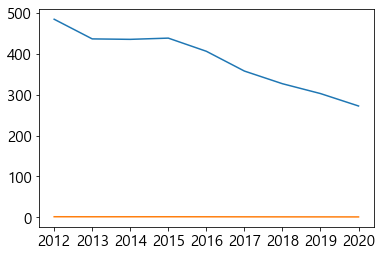

In [12]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])
# 데이터 값 차이가 많이 나 subplots 를 사용

## 데이터 시각화 (subplots)

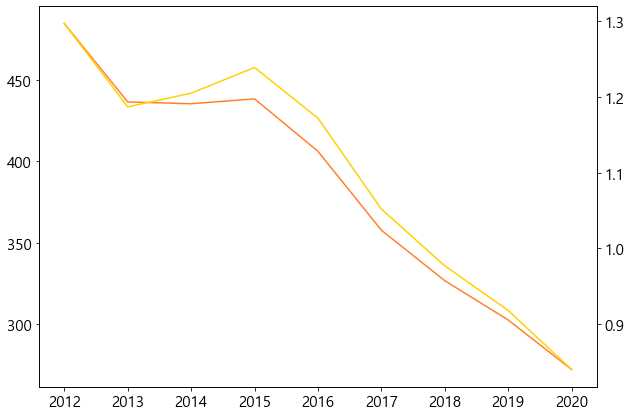

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index, df['출생아 수'], c='#ff812d')
    
ax2 = ax1.twinx() # twinx() : x 축을 공유하는 쌍둥이 axis

ax2.plot(df.index, df['합계 출산율'], c='#ffd100')

## y축

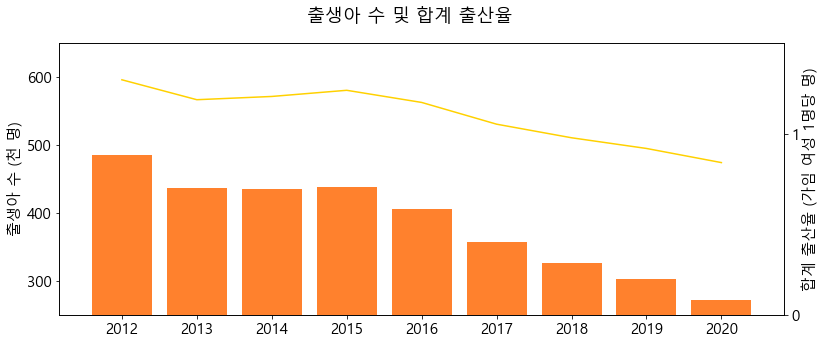

In [14]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율') # 그래프 제목

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650) # y의 최댓값, 최솟값
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis

ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5) # y의 최댓값, 최솟값
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], c='#ffd100')

## marker

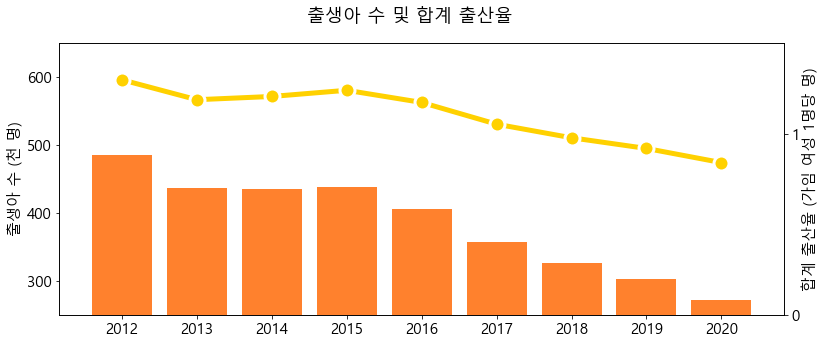

In [15]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis

ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], c='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3) # ms : markersize, lw : linewidth, mec : markeredgecolor, mew : markeredgewidth

## text

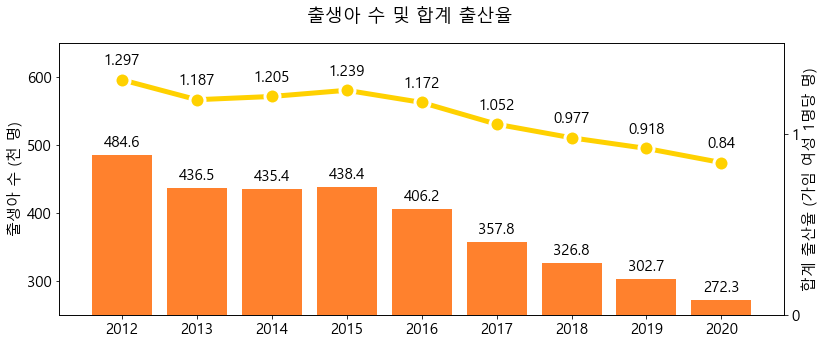

In [16]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis

ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], c='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3) # ms : markersize, lw : linewidth, mec : markeredgecolor, mew : markeredgewidth

for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.08, val, ha='center')

## grid, 범례

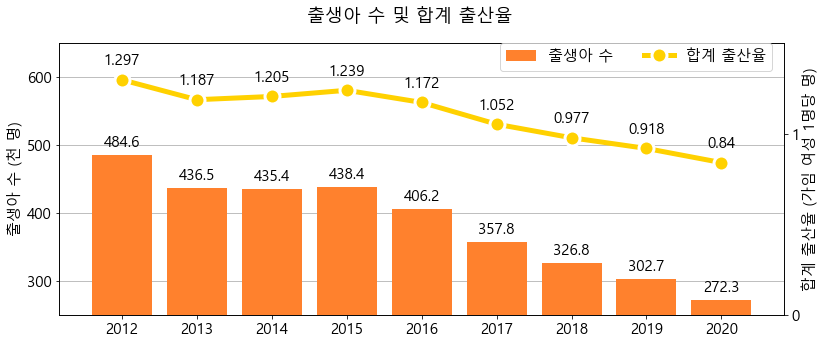

In [24]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율')

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 650)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d', label='출생아 수')

for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis

ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], c='#ffd100', label='합계 출산율', marker='o', ms=15, lw=5, mec='w', mew=3) # ms : markersize, lw : linewidth, mec : markeredgecolor, mew : markeredgewidth

for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.08, val, ha='center')
    
ax1.grid(axis='y')
ax1.set_axisbelow(True) # grid 선을 그래프 안쪽으로

fig.legend(ncol=2, loc=(0.605, 0.795))

fig.savefig('출생아 수 및 합계 출산율.png', dpi=100)